# Facial Identification Model Test
### To run a cell: Click the cell and press $shift + enter$

## Packages imported

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
import random

## Defined class for testing

In [2]:
class FaceIden(object):
    
    def __init__(self, set_directory = "dataset/", IMG_SIZE = (64, 64), BATCH_SIZE = 64):
        
        self.img_size = IMG_SIZE
        self.batch_size = BATCH_SIZE
        directory = "dataset/"
        seed = random.randint(0, 100)
        print('seed:', seed)
        
        self.train_set = image_dataset_from_directory(set_directory,
                                                      shuffle = True,
                                                      batch_size = BATCH_SIZE,
                                                      image_size = IMG_SIZE,
                                                      validation_split = 0.2,
                                                      subset = 'training', 
                                                      seed = seed)
        self.validation_set = image_dataset_from_directory(set_directory,
                                                     shuffle = True,
                                                     batch_size = BATCH_SIZE,
                                                     image_size = IMG_SIZE,
                                                     validation_split = 0.2,
                                                     subset = 'validation', 
                                                     seed = seed)
        
        self.class_names = self.train_set.class_names
        
        self.model = load_model('models/model_v2')
        
        
    def data_view(self, batch_num = 1):
        plt.figure(figsize=(10, 10))
        for images, labels in self.train_set.take(batch_num):
            for i in range(9):
                ax = plt.subplot(3, 3, i + 1)
                plt.imshow(images[i].numpy().astype("uint8"))
                plt.title(self.class_names[labels[i]])
                plt.axis("off")

        
    def test(self):
        image_batch, label_batch = next(iter(self.validation_set))
        output = self.model.predict(image_batch)

        plt.figure(figsize=(10, 10))
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(image_batch[i].numpy().astype("uint8"))
            plt.title(output[i])
            plt.axis("off")

## Created the object to view the model

In [3]:
x = FaceIden()
x.model.summary()

seed: 36
Found 2228 files belonging to 2 classes.
Using 1783 files for training.
Found 2228 files belonging to 2 classes.
Using 445 files for validation.
Model: "Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
sequential_68 (Sequential)   (None, 64, 64, 3)         0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 62, 62, 16)        448       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 62, 62, 16)        248       
_________________________________________________________________
activation_128 (Activation)  (None, 62, 62, 16)        0         
_________________________________________________________________
max_pooling2d_160 (MaxPoolin (None, 30

## Take a view at the original images and labels (raw data)

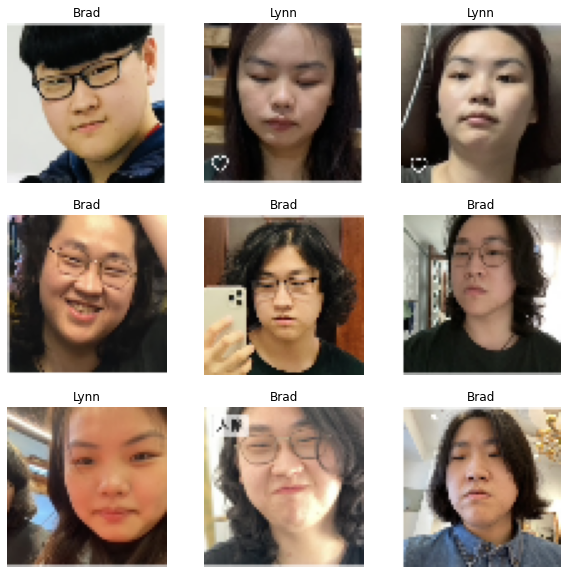

In [4]:
x.data_view()

## Predictions on the validation/test set
### Prediction > 0.5 implies the system thinks the image is Lynn
### Prediction <= 0.5 implies the system thinks the image is Brad

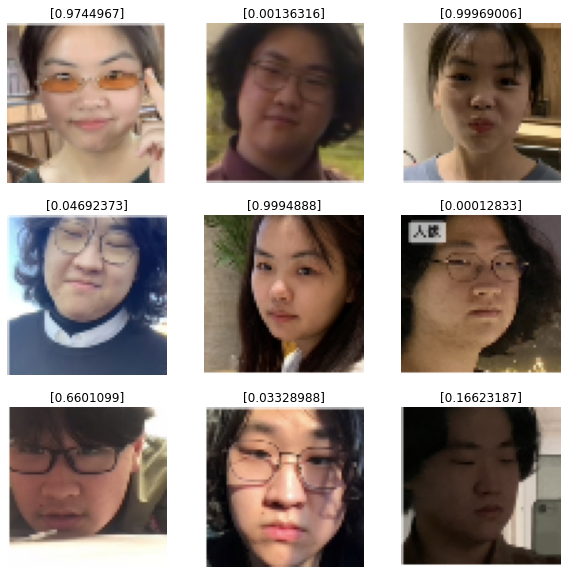

In [13]:
x.test()